<center><h1>Xiao_Luo_HW2</h1></center>
<br>
<br>

Name: Xiao Luo
<br>
Github Username: xluo23
<br>
USC ID: 2392693288

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [120]:
import pandas as pd
import numpy as np

Get the Cycle Power Plant Data Set

In [121]:
df = pd.read_excel("Folds5x2_pp.xlsx")
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


### (b) Exploring the data

#### i. rows and columns

In [122]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

print("\nThe rows represent that there are 9568 instances(samples) in this data set.")
print("The column 'AT' means average Ambient Temperature, 'V' means Exhaust Vacuum, 'AP' means Ambient Pressure, 'RH' means Relative Humidity, 'PE' means electrical energy output.")


Number of Rows:  9568
Number of Columns:  5

The rows represent that there are 9568 instances(samples) in this data set.
The column 'AT' means average Ambient Temperature, 'V' means Exhaust Vacuum, 'AP' means Ambient Pressure, 'RH' means Relative Humidity, 'PE' means electrical energy output.


#### ii. pairwise scatterplots of all the varianbles

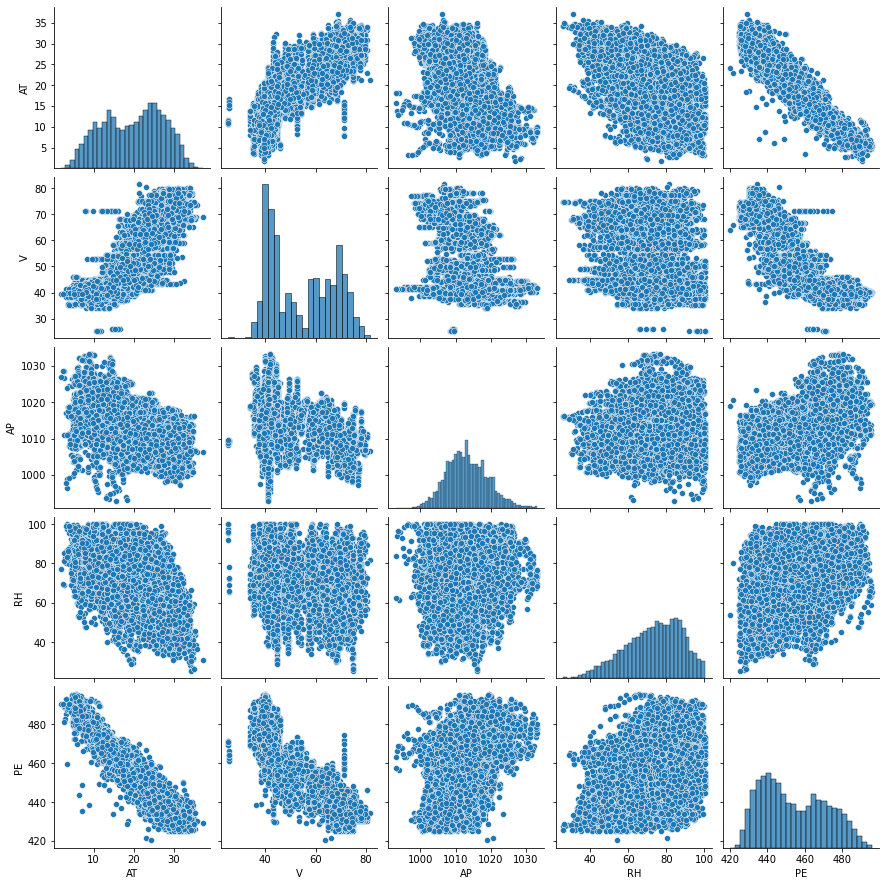

I find the relationships between AP & RH, V & RH, RH & PE are weak.


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

print("I find the relationships between AP & RH, V & RH, RH & PE are weak.")

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [124]:
mean = df.mean()
median = df.median()
range = (df.max() - df.min())
q1 = df.quantile(.25)
q3 = df.quantile(.75)
IQrange = q3 - q1

table = {'': ['mean', 'median', 'range', '1st quartile', '3rd quartile', 'interquartile range'],
         'AT': [mean[0], median[0], range[0], q1[0], q3[0], IQrange[0]],
         'V': [mean[1], median[1], range[1], q1[1], q3[1], IQrange[1]],
         'AP': [mean[2], median[2], range[2], q1[2], q3[2], IQrange[2]],
         'RH': [mean[3], median[3], range[3], q1[3], q3[3], IQrange[3]],
         'PE': [mean[4], median[4], range[4], q1[4], q3[4], IQrange[4]],}
summary = pd.DataFrame(table)
summary

,,AT,V,AP,RH,PE
0,mean,19.651231,54.305804,1013.259078,73.308978,454.365009
1,median,20.345000,52.080000,1012.940000,74.975000,451.550000
2,range,35.300000,56.200000,40.410000,74.600000,75.500000
3,1st quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
4,3rd quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
5,interquartile range,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression


The predictor: AT

The parameters of this model: 
 const    497.03412
AT        -2.17132
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:58:32   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

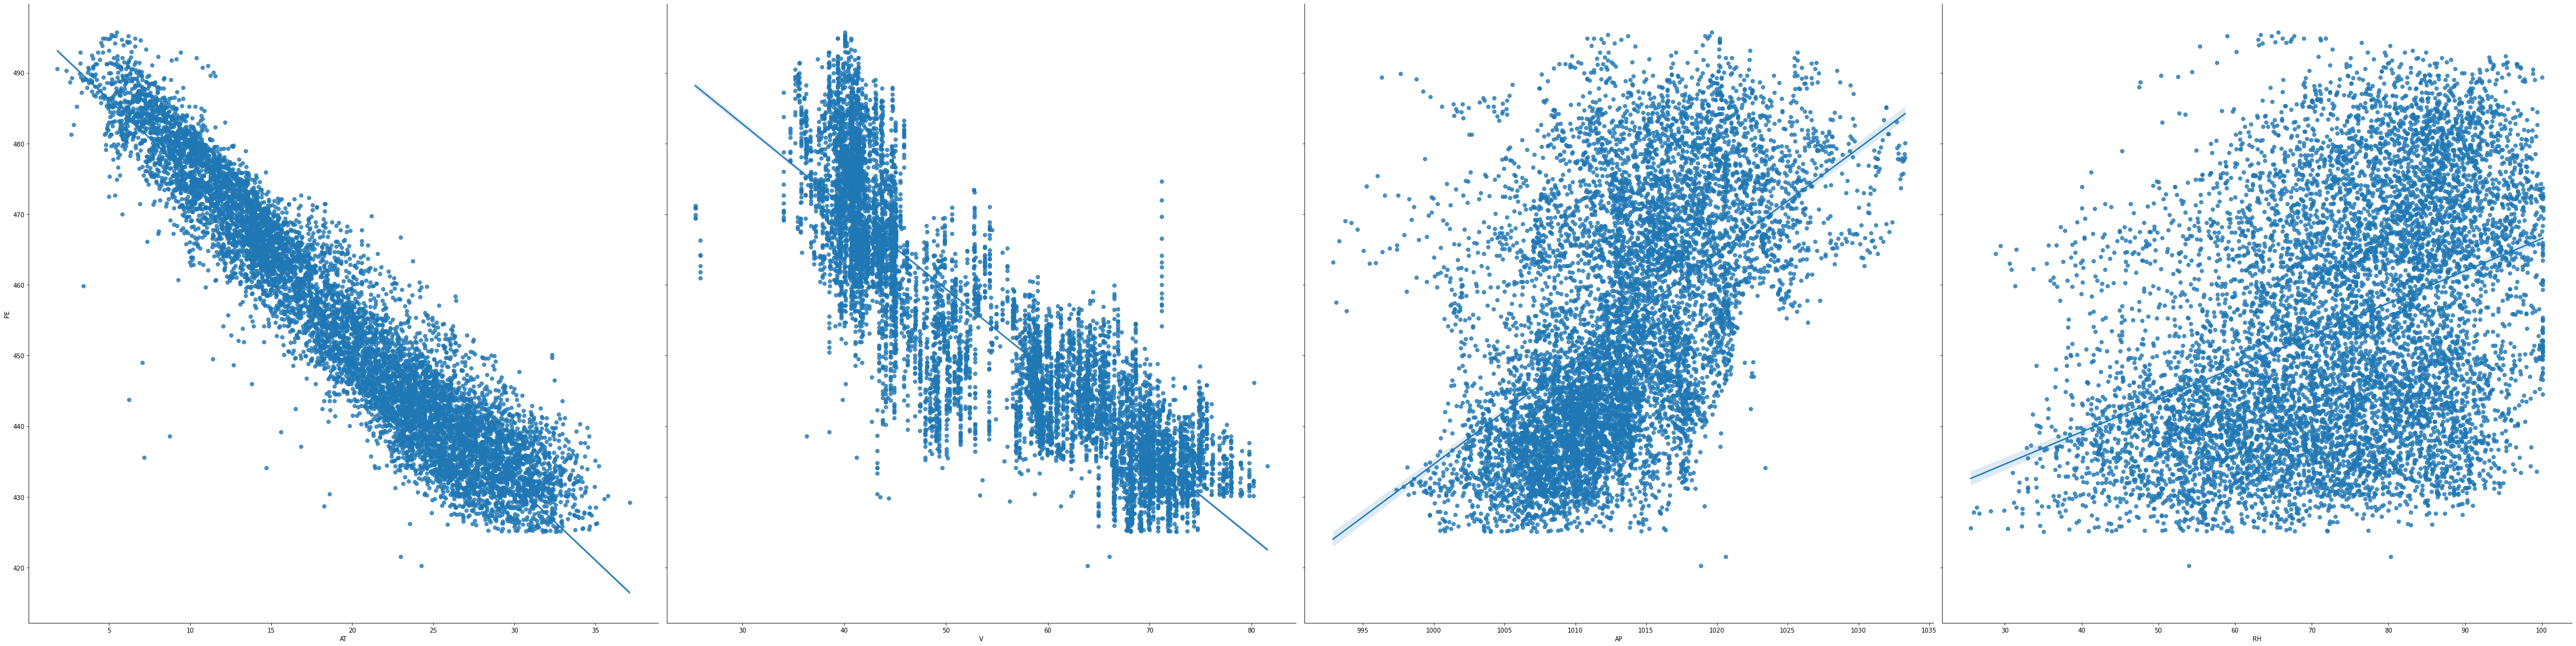

In [169]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X_var = ['AT', 'V', 'AP', 'RH']
X_coefficient = []
for i in X_var:
    X = df[i]
    Y = df['PE']
    print("\nThe predictor:", i)
    # print(Y)
    X_sm = sm.add_constant(X)
    lr = sm.OLS(Y, X_sm).fit()
    print("\nThe parameters of this model: \n", lr.params)
    X_coefficient.append(lr.params[1])
    print(lr.summary())


print("\n\n\nBased on the small p-value in each summary table above, there is a statistically significant association between the predictor and the response in each model. Therefore these four models are doing great and each single predictor is useful in predicting the dependent variable 'PE'.")

sns.pairplot(df, x_vars=X_var, y_vars='PE', kind='reg', height=15)
plt.show()

# df.describe()

### (d) Multiple Regression

In [126]:
X = df[['AT', 'V', 'AP', 'RH']]
Y = df['PE']
# print("\nThe predictor:", i)
# print(Y)
X_sm = sm.add_constant(X)
lr = sm.OLS(Y, X_sm).fit()
print("\nThe parameters of this model: \n", lr.params)

Y_coefficient = []
Y_coefficient.append(lr.params[1])
Y_coefficient.append(lr.params[2])
Y_coefficient.append(lr.params[3])
Y_coefficient.append(lr.params[4])
# print(Y_coefficient)

print(lr.summary())

print("\n\n\nBased on the small p-value in the summary table above, there is a statistically significant association between the predictors and the response in each model. Therefore all predictors in this model are useful in predicting the dependent variable 'PE'.")
print("\nFor all predictors, we can reject the null hypothesis βj = 0.")


The parameters of this model: 
 const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:34:02   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0

### (e) 1c Compare to 1d

Coefficient in a simple linear regression model: [-2.171319958517798, -1.1681351265557098, 1.489871673399116, 0.45565010226298147]
Coefficient in the multiple linear regression model: [-1.9775131066353948, -0.233916422582498, 0.06208294378085294, -0.15805410291641797]


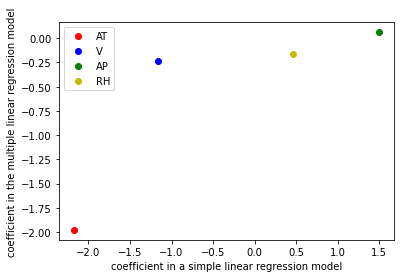

In [127]:
print("Coefficient in a simple linear regression model:", X_coefficient)
print("Coefficient in the multiple linear regression model:", Y_coefficient)

# for i in range(0,5):
#     plt.plot(X_coefficient[i], Y_coefficient[i], label=X_var[i])

plt.plot(-2.171319958517798, -1.9775131066353948, 'ro', label='AT')
plt.plot(-1.1681351265557098, -0.233916422582498, 'bo', label='V')
plt.plot(1.489871673399116, 0.06208294378085294, 'go', label='AP')
plt.plot(0.45565010226298147, -0.15805410291641797, 'yo', label='RH')
plt.legend()
plt.xlabel('coefficient in a simple linear regression model')
plt.ylabel('coefficient in the multiple linear regression model')
plt.show()

### (f) Nonlinear Association

The predictor of this model: AT


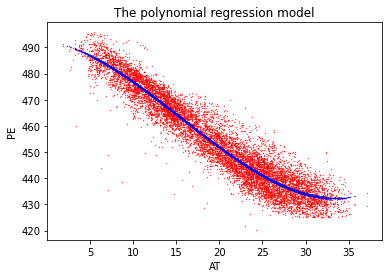

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:52:13   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

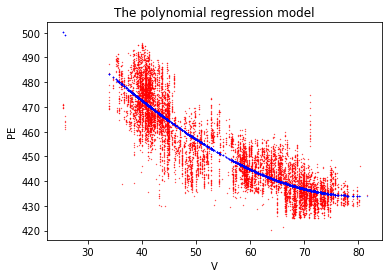

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:52:13   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

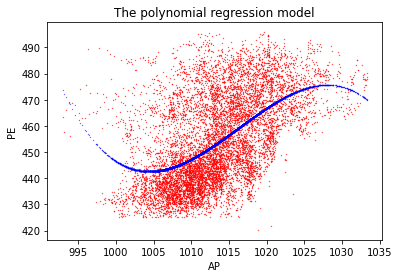

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:52:13   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

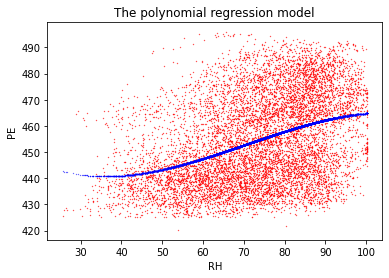

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:52:14   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

In [157]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3) # degree=3 means that we want to work with a 3rd degree polynomial
lin_reg = LinearRegression()

for x in X_var:
    print("The predictor of this model:", x)
    X = df[x].values
    y = df['PE'].values
    # poly.fit(poly_X, y)

    poly_X = poly.fit_transform(X.reshape(-1, 1))
    lin_reg.fit(poly_X, y)
    y_predicted = lin_reg.predict(poly_X)

    plt.title("The polynomial regression model")
    plt.plot(X, y_predicted, 'b.', markersize = 0.5)
    plt.xlabel(x)
    plt.ylabel('PE')
    plt.scatter(X, y, c = 'red', s = 0.1)
    plt.show()

    multix = np.column_stack((X, X**2, X**3))
    multix = sm.add_constant(multix)
    pr = sm.OLS(y, multix).fit()
    print(pr.summary())


print("\nBased on the small p-values in the summary tables above, almost every term is statistically significant except V^2 term in the model with the 'V' predictor.")
print("Therefore, there is suffcient evidence that there is nonlinear association between the predictor and the response.\n")


### (g) Interactions of Predictors

In [179]:
X = df[['AT', 'V', 'AP', 'RH']].values
Y = df['PE'].values

reg_inter = PolynomialFeatures(interaction_only=True,include_bias = False)
X_inter = reg_inter.fit_transform(X)
X_inter = pd.DataFrame(X_inter)
print("\nThe feature names in this full linear model:\n", reg_inter.get_feature_names_out(['AT', 'V', 'AP', 'RH']))
print("")
# print(X_inter.head(3))
X_sm = sm.add_constant(X_inter)
flr = sm.OLS(Y, X_sm).fit()
print(flr.summary())

print("\nConclusion: \nBased on the really small p-values in the summary table above, there is suffcient evidence that 4th term which is 'AT V' interaction, 6th term which is 'AT RH' interaction, 7th term which is 'V AP' interaction are statistically significant")


The feature names in this full linear model:
 ['AT' 'V' 'AP' 'RH' 'AT V' 'AT AP' 'AT RH' 'V AP' 'V RH' 'AP RH']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:13:33   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

### (h) Improvement

In [136]:
#Train the regression model on a randomly selected 70% subset of the data with all predictors

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)
# lmodel = LinearRegression().fit(x_train, y_train)
# lmodel.intercept_
# lmodel.coef_

from statsmodels.tools.eval_measures import mse
x_ac1 = sm.add_constant(x_train)
lm = sm.OLS(y_train,x_ac1).fit()
print(lm.summary())
ypred1 = lm.predict(x_ac1)
mse1 = mse(y_train, ypred1)
print("\nThe MSE of the model with all predictors using train set:", mse1)

x_ac2 = sm.add_constant(x_test)
ypred2 = lm.predict(x_ac2)
mse2 = mse(y_test, ypred2)
print("\nThe MSE of the model with all predictors using test set:", mse2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.232e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:37:56   Log-Likelihood:                -19598.
No. Observations:                6697   AIC:                         3.921e+04
Df Residuals:                    6692   BIC:                         3.924e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        453.7072     11.662     38.905      0.0

In [178]:
# run a regression model involving all possible interaction terms and quadratic nonlinearities

reg_all = PolynomialFeatures(interaction_only=False,include_bias = False)
X_all = reg_all.fit_transform(X)
print("\nThe feature names in this regression model involving all possible interaction terms and quadratic nonlinearities:\n", reg_all.get_feature_names_out(['AT', 'V', 'AP', 'RH']))
print("")
X_sm = sm.add_constant(X_all)
r_all = sm.OLS(Y, X_sm).fit()
# print(r_all.params)
# print(r_all.pvalues)
print(r_all.summary())



The feature names in this regression model involving all possible interaction terms and quadratic nonlinearities:
 ['AT' 'V' 'AP' 'RH' 'AT^2' 'AT V' 'AT AP' 'AT RH' 'V^2' 'V AP' 'V RH'
 'AP^2' 'AP RH' 'RH^2']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:13:15   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         

In [177]:
# remove insignificant variables using p-values

print("p-values for all variables:\n", r_all.pvalues)
print("")
print("The feature names in this regression model:\n", reg_all.get_feature_names_out(['AT', 'V', 'AP', 'RH']))
print("\nThe p-value of 1st, 2rd, 7th, 9th, 10th, 11th terms is larger than 0.01, which are 'AT', 'V', 'AT AP', 'V^2', 'V AP', 'V RH' terms.")
print("But we should keep 'AT' and 'V' for the other statistically significant interaction terms involving 'AT' or 'V'.")
print("Therefore, we remove 4 insignificant variables: 'AT AP', 'V^2', 'V AP', 'V RH' from this model.\n")

# print(X_all)
X_less = X_all[:, [0, 1, 2, 3, 4, 5, 7, 11, 12, 13]]
X_sm = sm.add_constant(X_less)
r_better = sm.OLS(Y, X_sm).fit()
print(r_better.summary())


# x_train_transform = reg_all.fit_transform(x_train)
# x_train_less = x_train_transform[:, [0, 1, 2, 3, 4, 5, 7, 11, 12, 13]]
# x_ac3 = sm.add_constant(x_train_less)
# ypred3 = r_better.predict(x_ac3)
# mse3 = mse(y_test, ypred3)
# print("\nThe MSE of the model with all predictors and significant interaction terms and quadratic nonlinearities using train set:", mse3)

x_test_transform = reg_all.fit_transform(x_test)
x_test_less = x_test_transform[:, [0, 1, 2, 3, 4, 5, 7, 11, 12, 13]]
x_ac4 = sm.add_constant(x_test_less)
ypred4 = r_better.predict(x_ac4)
mse4 = mse(y_test, ypred4)
print("\nThe MSE of the model with all predictors and significant interaction terms and quadratic nonlinearities using test set:", mse4)

p-values for all variables:
 [5.33263286e-10 6.08626336e-02 4.20933852e-02 2.57371740e-11
 8.36468460e-06 1.14198472e-07 8.19000011e-06 2.99813804e-01
 5.02500452e-05 1.08200229e-01 7.75801601e-02 4.44104351e-01
 2.10807789e-11 2.04841348e-05 4.28759883e-13]

The feature names in this regression model:
 ['AT' 'V' 'AP' 'RH' 'AT^2' 'AT V' 'AT AP' 'AT RH' 'V^2' 'V AP' 'V RH'
 'AP^2' 'AP RH' 'RH^2']

The p-value of 1st, 2rd, 7th, 9th, 10th, 11th terms is larger than 0.01, which are 'AT', 'V', 'AT AP', 'V^2', 'V AP', 'V RH' terms.
But we should keep 'AT' and 'V' for the other statistically significant interaction terms involving 'AT' or 'V'.
Therefore, we remove 4 insignificant variables: 'AT AP', 'V^2', 'V AP', 'V RH' from this model.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:              

### (i) KNN

The best k in the knn regression model using raw features: 6
The min test error in the knn regression model using raw features: 16.69405061728395


Text(0, 0.5, 'MSE (using raw features)')

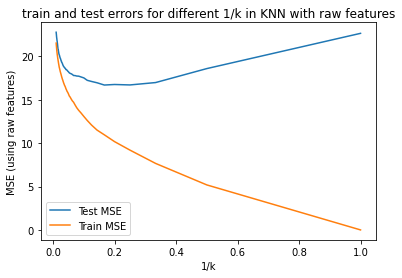

In [139]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)
k_values = np.arange(1,101)
min_error = 0
best_k = 0 
test_errors = []
train_errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train)
    test_pred_knn = knn.predict(x_test)
    train_pred_knn = knn.predict(x_train)
    test_error_knn = metrics.mean_squared_error(y_test,test_pred_knn)
    train_error_knn = metrics.mean_squared_error(y_train,train_pred_knn)
    test_errors.append(test_error_knn)
    train_errors.append(train_error_knn)
    if min_error == 0 or test_error_knn < min_error:
        min_error = test_error_knn
        best_k = k
    # test_mse = np.mean((test_pred_knn-y_test)**2)
    # print(test_mse)

print("The best k in the knn regression model using raw features:", best_k)
print("The min test error in the knn regression model using raw features:", min_error)    


plt.title('train and test errors for different 1/k in KNN with raw features')
plt.plot(1 / k_values, test_errors, label='Test MSE')
plt.plot(1 / k_values, train_errors, label='Train MSE')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('MSE (using raw features)')

The best k in the knn regression model using normalized features: 9
The min test error in the knn regression model using normalized features: 18.545379057067056


Text(0, 0.5, 'MSE (using normalized features)')

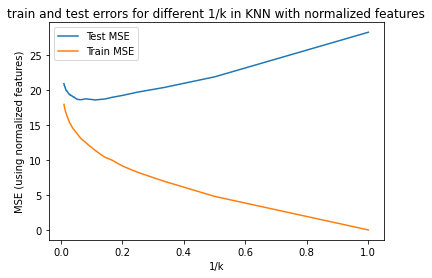

In [140]:
# Normalize features data
from sklearn import preprocessing
minMaxScaler = preprocessing.MinMaxScaler()
nor_x_train = minMaxScaler.fit_transform(x_train)
nor_x_test = minMaxScaler.fit_transform(x_test)
nor_test_errors = []
nor_train_errors = []
nor_min_error = 0

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(nor_x_train, y_train)
    test_pred_knn = knn.predict(nor_x_test)
    train_pred_knn = knn.predict(nor_x_train)
    test_error_knn = metrics.mean_squared_error(y_test,test_pred_knn)
    train_error_knn = metrics.mean_squared_error(y_train,train_pred_knn)
    nor_test_errors.append(test_error_knn)
    nor_train_errors.append(train_error_knn)
    if nor_min_error == 0 or test_error_knn < nor_min_error:
        nor_min_error = test_error_knn
        best_k = k
    # test_mse = np.mean((test_pred_knn-y_test)**2)
    # print(test_mse)
print("The best k in the knn regression model using normalized features:", best_k)
print("The min test error in the knn regression model using normalized features:", nor_min_error)   

plt.title('train and test errors for different 1/k in KNN with normalized features')
plt.plot(1 / k_values, nor_test_errors, label='Test MSE')
plt.plot(1 / k_values, nor_train_errors, label='Train MSE')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('MSE (using normalized features)')

### (j ) Compare KNN and Linear

In [180]:
print("MSE of the KNN regression with normalized features:", nor_min_error)   
print("MSE of the KNN regression with raw features:", min_error)  
print("MSE of the linear regression model that has the smallest test error:", mse2)
print("Compare the MSE of the three models above, the knn regression model using raw features is better to predict the response.")

MSE of the KNN regression with normalized features: 18.545379057067056
MSE of the KNN regression with raw features: 16.69405061728395
MSE of the linear regression model that has the smallest test error: 21.665316199915736
Compare the MSE of the three models above, the knn regression model using raw features is better to predict the response.


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

In [142]:
print("We would expect the performance of a flexible statistical learning method to be better than an inflexible method because with a large sample size, a flexible method would fit the data better.")

We would expect the performance of a flexible statistical learning method to be better than an inflexible method because with a large sample size, a flexible method would fit the data better.


### (b) The number of predictors p is extremely large, and the number of observations n is small.

In [65]:
print("A flexible statistical learning method would be worse than an inflexible one because with the small n size, it would more likely to overfit.")

A flexible statistical learning method would be worse than an inflexible one because with the small n size, it would more likely to overfit.


### (c) The relationship between the predictors and response is highly non-linear.

In [68]:
print("If the relationship between the predictors and response is highly non-linear, then with more degrees of freedom (model parameters), a flexible statistical learning method would fit the data better than an inflexible one.")

If the relationship between the predictors and response is highly non-linear, then with more degrees of freedom (model parameters), a flexible statistical learning method would fit the data better than an inflexible one.


### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

In [70]:
print("If the variance of the noise is high, the flexible method might overfit the data(fit the error term as well), so the less flexible fits would do better. Therefore, a flexible statistical learning method would be worse than an inflexible one.")

If the variance of the noise is high, the flexible method might overfit the data(fit the error term as well), so the less flexible fits would do better. Therefore, a flexible statistical learning method would be worse than an inflexible one.


## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [107]:
table = {'Obs.': [1,2,3,4,5,6],
         'X1': [0,2,0,0,-1,1],
         'X2': [3,0,1,1,0,1],
         'X3': [0,0,3,2,1,1],
         'Y': ['Red','Red','Red','Green','Green','Red']}
df = pd.DataFrame(table)
print(df)

# Euclidean distance formula: d =√[(x2 – x1)^2 + (y2 – y1)^2]
import math
d1 = math.sqrt((0 - 0)**2 + (3 - 0)**2 + (0 - 0)**2)
d2 = math.sqrt((2 - 0)**2 + (0 - 0)**2 + (0 - 0)**2)
d3 = math.sqrt((0 - 0)**2 + (1 - 0)**2 + (3 - 0)**2)
d4 = math.sqrt((0 - 0)**2 + (1 - 0)**2 + (2 - 0)**2)
d5 = math.sqrt((-1 - 0)**2 + (0 - 0)**2 + (1 - 0)**2)
d6 = math.sqrt((1 - 0)**2 + (1 - 0)**2 + (1 - 0)**2)

print("\nThe Euclidean distance of obervation 1:", d1)
print("The Euclidean distance of obervation 2:", d2)
print("The Euclidean distance of obervation 3:", d3)
print("The Euclidean distance of obervation 4:", d4)
print("The Euclidean distance of obervation 5:", d5)
print("The Euclidean distance of obervation 6:", d6)

   Obs.  X1  X2  X3      Y
0     1   0   3   0    Red
1     2   2   0   0    Red
2     3   0   1   3    Red
3     4   0   1   2  Green
4     5  -1   0   1  Green
5     6   1   1   1    Red

The Euclidean distance of obervation 1: 3.0
The Euclidean distance of obervation 2: 2.0
The Euclidean distance of obervation 3: 3.1622776601683795
The Euclidean distance of obervation 4: 2.23606797749979
The Euclidean distance of obervation 5: 1.4142135623730951
The Euclidean distance of obervation 6: 1.7320508075688772


### (b) What is our prediction with K = 1? Why?

In [108]:
print("With k = 1, the obervation 5 is the nearest neighbor to the test point, which has the Euclidean distance ~1.414. So based on the y value of observation5, our prediction is green.")

With k = 1, the obervation 5 is the nearest neighbor to the test point, which has the Euclidean distance ~1.414. So based on the y value of observation5, our prediction is green.


### (c) What is our prediction with K = 3? Why?

In [109]:
print("With k = 3, the obervation #2, #5, and #6 are the three nearest neighbors to the test point.")
print("Since the obervation #2 is red, #5 is green, #6 is red, our prediction for the test point is red based on the majority.")

With k = 3, the obervation #2, #5, and #6 are the three nearest neighbors to the test point.
Since the obervation #2 is red, #5 is green, #6 is red, our prediction for the test point is red based on the majority.


### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

In [118]:
print("We should expect the best value of K to be small if the Bayes decision boundary is non-linear because with small k, the classifier has low bias and high variance, which is more flexible; and as K grows, the method becomes less flexible and produces a decision boundary that is close to linear.")

We should expect the best value of K to be small if the Bayes decision boundary is non-linear because with small k, the classifier has low bias and high variance, which is more flexible; and as K grows, the method becomes less flexible and produces a decision boundary that is close to linear.
